In [30]:
import pandas as pd
from sqlalchemy import create_engine
#from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt


### Store CSV into DataFrame

In [31]:
csv_file = "https://raw.githubusercontent.com/nagenderreddy5/ETL-Project/main/NetflixOriginals.csv"
netflix_originals_df = pd.read_csv(csv_file)
netflix_originals_df

,Title,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
0,House of Cards,Political drama,"political,drama",1-Feb-13,"6 seasons, 73 episodes",6,73,42–59 min.,42,59,Ended,0,Drama,English
1,Hemlock Grove,Horror/thriller,"horror,thriller",19-Apr-13,"3 seasons, 33 episodes",3,33,45–58 min.,45,58,Ended,0,Drama,English
2,Orange Is the New Black,Comedy-drama,comedy-drama,11-Jul-13,"6 seasons, 78 episodes",6,78,50–92 min.,50,92,Renewed,1,Drama,English
3,Marco Polo,Historical drama,"historical,drama",12-Dec-14,"2 seasons, 20 episodes",2,20,48–65 min.,48,65,Ended,0,Drama,English
4,Bloodline,Thriller,thriller,20-Mar-15,"3 seasons, 33 episodes",3,33,48–68 min.,48,68,Ended,0,Drama,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,Busted!,Korean language variety show,"korean,language,variety,show",4-May-18,"1 season, 10 episodes",1,10,75–98 min.,75,98,Renewed,1,VarietyTalk,Korean
354,The Break with Michelle Wolf,Late-night,late-night,27-May-18,"1 season, 10 episodes",1,10,27 min.,27,27,Renewed,1,VarietyTalk,English
355,Norm Macdonald Has a Show,Talk show,"talk,show",14-Sep-18,"1 season, 10 episodes",1,10,26–35 min.,26,35,Pending,1,VarietyTalk,English
356,Patriot Act with Hasan Minhaj,Talk show,"talk,show",28-Oct-18,"3 volumes, 19 episodes",0,19,23–30 min.,23,30,Renewed,1,VarietyTalk,English


In [32]:
netflix_originals_df.columns

Index(['Title', 'Genre', 'GenreLabels', 'Premiere', 'Seasons', 'SeasonsParsed',
       'EpisodesParsed', 'Length', 'MinLength', 'MaxLength', 'Status',
       'Active', 'Table', 'Language'],
      dtype='object')

### Create new data with select columns

In [33]:
new_netflix_originals_df = netflix_originals_df[['Title', 'Genre', 'Premiere']].copy()
#new_netflix_originals_df = new_netflix_originals_df.reset_index(drop=True, inplace=True)
new_netflix_originals_df

,Title,Genre,Premiere
0,House of Cards,Political drama,1-Feb-13
1,Hemlock Grove,Horror/thriller,19-Apr-13
2,Orange Is the New Black,Comedy-drama,11-Jul-13
3,Marco Polo,Historical drama,12-Dec-14
4,Bloodline,Thriller,20-Mar-15
...,...,...,...
353,Busted!,Korean language variety show,4-May-18
354,The Break with Michelle Wolf,Late-night,27-May-18
355,Norm Macdonald Has a Show,Talk show,14-Sep-18
356,Patriot Act with Hasan Minhaj,Talk show,28-Oct-18


In [34]:
new_netflix_originals_df.columns

Index(['Title', 'Genre', 'Premiere'], dtype='object')

In [35]:
new_netflix_originals_df['Premiere'] = pd.to_datetime(new_netflix_originals_df['Premiere'], infer_datetime_format=True)
new_netflix_originals_df

,Title,Genre,Premiere
0,House of Cards,Political drama,2013-02-01
1,Hemlock Grove,Horror/thriller,2013-04-19
2,Orange Is the New Black,Comedy-drama,2013-07-11
3,Marco Polo,Historical drama,2014-12-12
4,Bloodline,Thriller,2015-03-20
...,...,...,...
353,Busted!,Korean language variety show,2018-05-04
354,The Break with Michelle Wolf,Late-night,2018-05-27
355,Norm Macdonald Has a Show,Talk show,2018-09-14
356,Patriot Act with Hasan Minhaj,Talk show,2018-10-28


In [36]:
start_date = "01-01-2018"
end_date = "12-31-2020"

after_start_date = new_netflix_originals_df["Premiere"] >= start_date
before_end_date = new_netflix_originals_df["Premiere"] <= end_date
between_two_dates = after_start_date & before_end_date
new_netflix_originals_df = new_netflix_originals_df.loc[between_two_dates]

new_netflix_originals_df

,Title,Genre,Premiere
18,Altered Carbon,Science fiction,2018-02-02
19,Seven Seconds,Crime drama,2018-02-23
20,Lost in Space,Science fiction,2018-04-13
21,Insatiable,Dark comedy-drama,2018-08-10
22,The Innocents,Supernatural fiction,2018-08-24
...,...,...,...
353,Busted!,Korean language variety show,2018-05-04
354,The Break with Michelle Wolf,Late-night,2018-05-27
355,Norm Macdonald Has a Show,Talk show,2018-09-14
356,Patriot Act with Hasan Minhaj,Talk show,2018-10-28


In [37]:
new_netflix_originals_df['Qtr'] = pd.PeriodIndex(pd.to_datetime(new_netflix_originals_df.Premiere), freq='Q')
new_netflix_originals_df

<ipython-input-37-1865ec780312>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_netflix_originals_df['Qtr'] = pd.PeriodIndex(pd.to_datetime(new_netflix_originals_df.Premiere), freq='Q')


,Title,Genre,Premiere,Qtr
18,Altered Carbon,Science fiction,2018-02-02,2018Q1
19,Seven Seconds,Crime drama,2018-02-23,2018Q1
20,Lost in Space,Science fiction,2018-04-13,2018Q2
21,Insatiable,Dark comedy-drama,2018-08-10,2018Q3
22,The Innocents,Supernatural fiction,2018-08-24,2018Q3
...,...,...,...,...
353,Busted!,Korean language variety show,2018-05-04,2018Q2
354,The Break with Michelle Wolf,Late-night,2018-05-27,2018Q2
355,Norm Macdonald Has a Show,Talk show,2018-09-14,2018Q3
356,Patriot Act with Hasan Minhaj,Talk show,2018-10-28,2018Q4


In [38]:
new_netflix_originals_df['Years']=new_netflix_originals_df['Qtr'].astype(str).str[-2:] + ' - '+ new_netflix_originals_df['Qtr'].astype(str).str[:4]
new_netflix_originals_df

<ipython-input-38-a3e610a3d32e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_netflix_originals_df['Years']=new_netflix_originals_df['Qtr'].astype(str).str[-2:] + ' - '+ new_netflix_originals_df['Qtr'].astype(str).str[:4]


,Title,Genre,Premiere,Qtr,Years
18,Altered Carbon,Science fiction,2018-02-02,2018Q1,Q1 - 2018
19,Seven Seconds,Crime drama,2018-02-23,2018Q1,Q1 - 2018
20,Lost in Space,Science fiction,2018-04-13,2018Q2,Q2 - 2018
21,Insatiable,Dark comedy-drama,2018-08-10,2018Q3,Q3 - 2018
22,The Innocents,Supernatural fiction,2018-08-24,2018Q3,Q3 - 2018
...,...,...,...,...,...
353,Busted!,Korean language variety show,2018-05-04,2018Q2,Q2 - 2018
354,The Break with Michelle Wolf,Late-night,2018-05-27,2018Q2,Q2 - 2018
355,Norm Macdonald Has a Show,Talk show,2018-09-14,2018Q3,Q3 - 2018
356,Patriot Act with Hasan Minhaj,Talk show,2018-10-28,2018Q4,Q4 - 2018


In [39]:
new_netflix_originals_df.columns

Index(['Title', 'Genre', 'Premiere', 'Qtr', 'Years'], dtype='object')

In [40]:
clean_new_netflix_originals_df=new_netflix_originals_df.drop(['Premiere', 'Qtr'], axis=1)
clean_new_netflix_originals_df

,Title,Genre,Years
18,Altered Carbon,Science fiction,Q1 - 2018
19,Seven Seconds,Crime drama,Q1 - 2018
20,Lost in Space,Science fiction,Q2 - 2018
21,Insatiable,Dark comedy-drama,Q3 - 2018
22,The Innocents,Supernatural fiction,Q3 - 2018
...,...,...,...
353,Busted!,Korean language variety show,Q2 - 2018
354,The Break with Michelle Wolf,Late-night,Q2 - 2018
355,Norm Macdonald Has a Show,Talk show,Q3 - 2018
356,Patriot Act with Hasan Minhaj,Talk show,Q4 - 2018


In [41]:
clean_new_netflix_originals_df.to_csv(r'C://Users//nagen//OneDrive//Documents//GitHub//GT-ATL-DATA-PT-09-2020-U-C-2//GT-ATL-DATA-PT-09-2020-U-C-2//13-ETL-Project//Resources//Netflix_originals_clean.csv', index = False)

In [42]:
netflix_sub_df = pd.read_csv('https://raw.githubusercontent.com/nagenderreddy5/ETL-Project/main/DataNetflixSubscriber2020_V2.csv')
netflix_sub_df.head()

,Area,Years,Subscribers
0,United States and Canada,Q1 - 2018,60909000
1,"Europe, Middle East and Africa",Q1 - 2018,29339000
2,Latin America,Q1 - 2018,21260000
3,Asia-Pacific,Q1 - 2018,7394000
4,United States and Canada,Q2 - 2018,61870000


In [43]:
subscriber_df = netflix_sub_df[netflix_sub_df.Area.str.contains('United States and Canada',case=False)]
subscriber_df

,Area,Years,Subscribers
0,United States and Canada,Q1 - 2018,60909000
4,United States and Canada,Q2 - 2018,61870000
8,United States and Canada,Q3 - 2018,63010000
12,United States and Canada,Q4 - 2018,64757000
16,United States and Canada,Q1 - 2019,66633000
20,United States and Canada,Q2 - 2019,66501000
24,United States and Canada,Q3 - 2019,67114000
28,United States and Canada,Q4 - 2019,67662000
32,United States and Canada,Q1 - 2020,69969000
36,United States and Canada,Q2 - 2020,72904000


In [44]:
subscriber_df.dtypes

Area           object
Years          object
Subscribers     int64
dtype: object

In [45]:
netflix_rev_df = pd.read_csv('https://raw.githubusercontent.com/nagenderreddy5/ETL-Project/main/DataNetflixRevenue2020_V2.csv')
netflix_rev_df.head()

,Area,Years,Revenue
0,United States and Canada,Q1 - 2018,1976157000
1,"Europe, Middle East and Africa",Q1 - 2018,886649000
2,Latin America,Q1 - 2018,540182000
3,Asia-Pacific,Q1 - 2018,199117000
4,United States and Canada,Q2 - 2018,2049546000


In [46]:
revenue_df = netflix_rev_df[netflix_rev_df.Area.str.contains('United States and Canada',case=False)]
revenue_df

,Area,Years,Revenue
0,United States and Canada,Q1 - 2018,1976157000
4,United States and Canada,Q2 - 2018,2049546000
8,United States and Canada,Q3 - 2018,2094850000
12,United States and Canada,Q4 - 2018,2160979000
16,United States and Canada,Q1 - 2019,2256851000
20,United States and Canada,Q2 - 2019,2501199000
24,United States and Canada,Q3 - 2019,2621250000
28,United States and Canada,Q4 - 2019,2671908000
32,United States and Canada,Q1 - 2020,2702776000
36,United States and Canada,Q2 - 2020,2839670000


In [47]:
revenue_df.dtypes

Area       object
Years      object
Revenue     int64
dtype: object

In [48]:
combined_df1=pd.merge(clean_new_netflix_originals_df, revenue_df, how='outer', on='Years')
combined_df1.tail(5)

,Title,Genre,Years,Area,Revenue
217,Love Alarm,Romantic comedy,Q3 - 2019,United States and Canada,2621250000
218,The Last Czars,Docu-series,Q3 - 2019,United States and Canada,2621250000
219,NaN,NaN,Q4 - 2019,United States and Canada,2671908000
220,NaN,NaN,Q1 - 2020,United States and Canada,2702776000
221,NaN,NaN,Q2 - 2020,United States and Canada,2839670000


In [49]:
clean_combined_df1=combined_df1.dropna()
clean_combined_df1

,Title,Genre,Years,Area,Revenue
0,Altered Carbon,Science fiction,Q1 - 2018,United States and Canada,1976157000
1,Seven Seconds,Crime drama,Q1 - 2018,United States and Canada,1976157000
2,Everything Sucks!,Coming-of-age comedy,Q1 - 2018,United States and Canada,1976157000
3,On My Block,Coming-of-age comedy,Q1 - 2018,United States and Canada,1976157000
4,Devilman Crybaby,Supernatural horror,Q1 - 2018,United States and Canada,1976157000
...,...,...,...,...,...
214,Typewriter,Horror,Q3 - 2019,United States and Canada,2621250000
215,The Naked Director,Drama,Q3 - 2019,United States and Canada,2621250000
216,Sintonia,Drama,Q3 - 2019,United States and Canada,2621250000
217,Love Alarm,Romantic comedy,Q3 - 2019,United States and Canada,2621250000


In [50]:
combined_df2=pd.merge(clean_combined_df1, subscriber_df, how='outer', on=['Area', 'Years'])
combined_df2

,Title,Genre,Years,Area,Revenue,Subscribers
0,Altered Carbon,Science fiction,Q1 - 2018,United States and Canada,1.976157e+09,60909000
1,Seven Seconds,Crime drama,Q1 - 2018,United States and Canada,1.976157e+09,60909000
2,Everything Sucks!,Coming-of-age comedy,Q1 - 2018,United States and Canada,1.976157e+09,60909000
3,On My Block,Coming-of-age comedy,Q1 - 2018,United States and Canada,1.976157e+09,60909000
4,Devilman Crybaby,Supernatural horror,Q1 - 2018,United States and Canada,1.976157e+09,60909000
...,...,...,...,...,...,...
217,Love Alarm,Romantic comedy,Q3 - 2019,United States and Canada,2.621250e+09,67114000
218,The Last Czars,Docu-series,Q3 - 2019,United States and Canada,2.621250e+09,67114000
219,NaN,NaN,Q4 - 2019,United States and Canada,NaN,67662000
220,NaN,NaN,Q1 - 2020,United States and Canada,NaN,69969000


In [51]:
clean_combined_df2=combined_df2.dropna()
clean_combined_df2

,Title,Genre,Years,Area,Revenue,Subscribers
0,Altered Carbon,Science fiction,Q1 - 2018,United States and Canada,1.976157e+09,60909000
1,Seven Seconds,Crime drama,Q1 - 2018,United States and Canada,1.976157e+09,60909000
2,Everything Sucks!,Coming-of-age comedy,Q1 - 2018,United States and Canada,1.976157e+09,60909000
3,On My Block,Coming-of-age comedy,Q1 - 2018,United States and Canada,1.976157e+09,60909000
4,Devilman Crybaby,Supernatural horror,Q1 - 2018,United States and Canada,1.976157e+09,60909000
...,...,...,...,...,...,...
214,Typewriter,Horror,Q3 - 2019,United States and Canada,2.621250e+09,67114000
215,The Naked Director,Drama,Q3 - 2019,United States and Canada,2.621250e+09,67114000
216,Sintonia,Drama,Q3 - 2019,United States and Canada,2.621250e+09,67114000
217,Love Alarm,Romantic comedy,Q3 - 2019,United States and Canada,2.621250e+09,67114000


In [52]:
clean_combined_df2.to_csv(r'C://Users//nagen//OneDrive//Documents//GitHub//GT-ATL-DATA-PT-09-2020-U-C-2//GT-ATL-DATA-PT-09-2020-U-C-2//13-ETL-Project//Resources//cleaned_combined_netflixdata.csv', index = False)

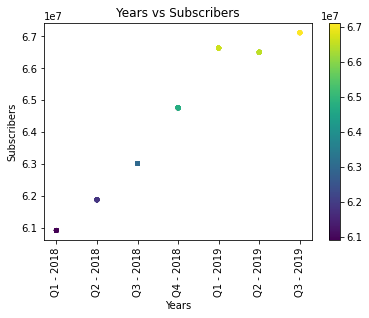

In [53]:
# Use Pandas Plotting with Matplotlib to plot the data
x = clean_combined_df2["Years"]
y = clean_combined_df2["Subscribers"]
#plot scatter
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("Years vs Subscribers")
plt.xlabel("Years")
plt.ylabel("Subscribers")
plt.xticks(rotation="vertical")
plt.savefig("C:\\Users\\nagen\\OneDrive\\Documents\\GitHub\\GT-ATL-DATA-PT-09-2020-U-C-2\\GT-ATL-DATA-PT-09-2020-U-C-2\\13-ETL-Project\\Resources\\fig8")
plt.show()

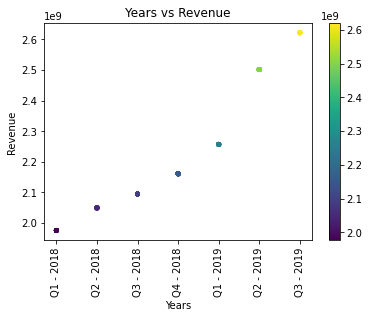

In [54]:
# Use Pandas Plotting with Matplotlib to plot the data
x = clean_combined_df2["Years"]
y = clean_combined_df2["Revenue"]
#plot scatter
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("Years vs Revenue")
plt.xlabel("Years")
plt.ylabel("Revenue")
plt.xticks(rotation="vertical")
plt.savefig("C:\\Users\\nagen\\OneDrive\\Documents\\GitHub\\GT-ATL-DATA-PT-09-2020-U-C-2\\GT-ATL-DATA-PT-09-2020-U-C-2\\13-ETL-Project\\Resources\\fig9")
plt.show()

In [55]:
rds_connection_string = "postgres:postgres@localhost:5432/Netflix_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [56]:
engine.table_names()

['netflix_original', 'netflix_subscriber', 'netflix_revenue']

In [57]:
subscriber_df.to_sql(name='netflix_subscriber', con=engine, if_exists='append', index=False)

In [58]:
revenue_df.to_sql(name='netflix_revenue', con=engine, if_exists='append', index=False)

In [59]:
clean_new_netflix_originals_df.to_sql(name='netflix_original', con=engine, if_exists='append', index=False)